Mini-project 2: Data Preprocessing for Wine Quality Analysis


What You Will Learn
Advanced data loading and exploration with Pandas.
Data cleaning and preprocessing techniques.


Your Task:
Using the Wine Quality dataset, explore the following questions:

How do different chemical properties correlate with the quality of wine?
Is there a significant difference in quality between red and white wines?


Resources
Use the Wine Quality dataset available on Kaggle for the first question and this one Red and White Wine for the second question.



Hint
Introduction to the Dataset:

Download the dataset from Kaggle.
Load the dataset using Pandas.
Explore the dataset by examining the columns, data types, and key statistics using functions like head(), info(), describe(), etc.
Data Cleaning and Preprocessing:

Check for and handle missing values (e.g., using dropna() or fillna()) and detect outliers using techniques like IQR or z-scores.
Examine the distribution of continuous variables (e.g., using histograms or boxplots) and transform variables with high skew (e.g., using log transformations) if necessary.
(optional) Create new variables, such as combining pH and acidity to create an “acidity level” or grouping wines into categories based on sugar content.


In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [3]:
df =pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W4/D5/Mini Project/Wine Quality/wine-quality-white-and-red.csv')

In [4]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No NA Values in the dataset.

In [8]:
df.loc[df.duplicated()]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
20,white,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
#Show the quality buckets per wine. What is the quality distribution across the reds, what is the quality distribution across the whites.
red_quality = df['quality'].value_counts([df['type'] == 'red'])*100
red_quality = red_quality.round(2)
print(red_quality)

quality
6    43.65
5    32.91
7    16.61
4     3.32
8     2.97
3     0.46
9     0.08
Name: proportion, dtype: float64


In [10]:
white_quality = df['quality'].value_counts([df['type'] == 'white'])*100 
white_quality = white_quality.round(2) 
print(white_quality)

quality
6    43.65
5    32.91
7    16.61
4     3.32
8     2.97
3     0.46
9     0.08
Name: proportion, dtype: float64


In [19]:
# Count duplicates for 'red'
red_duplicates = df[df['type'] == 'red'].duplicated().sum()

# Count duplicates for 'white'
white_duplicates = df[df['type'] == 'white'].duplicated().sum()

print(f"Red duplicates: {red_duplicates}")
print(f"White duplicates: {white_duplicates}")

Red duplicates: 240
White duplicates: 937


It appears that there are 1177 rows of duplicated information (240 Red Duplicates, and 937 White Duplicates). That accounts for almost 20% of the data in our dataset. We should dive deeper into this to see if we can drop any values that do not need to be there. We can do this by looking at specific columns and understanding if a wine is counted more than once and if it is neccessary that a wine is counted more than once. We can also see if there is outdated information on that wine that can be removed. It is also possible that duplicated wines with exactly the same results may be different vintages of the same vineyard, or different brands from the same region. Either way the presence of duplicated values will have an impact on the results. We need to decide if the duplicates are worth keeping or not. 

Another weird aspect of this data set were that the quality per type was exxactly the same even though the data for red and data for white are very different. Couldn't figure that part out either.

Update: I decided to not remove the duplicates as there was not enough info to determine if they were unique wines or not. If this were a real world example, I would at this juncture raise the flag and ask the people who provided this information if they know why there are so many duplicates. Try and understand the logic behind the dataset and possibly add a column to help create a differentiation. Possibly year, or brand, or grape type depending on the info provided by the client. Alternatively I would provide analysis for the dataset with duplicated values and droped duplicated values. For the sake of this assignment I will only provide the former. 

In [48]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

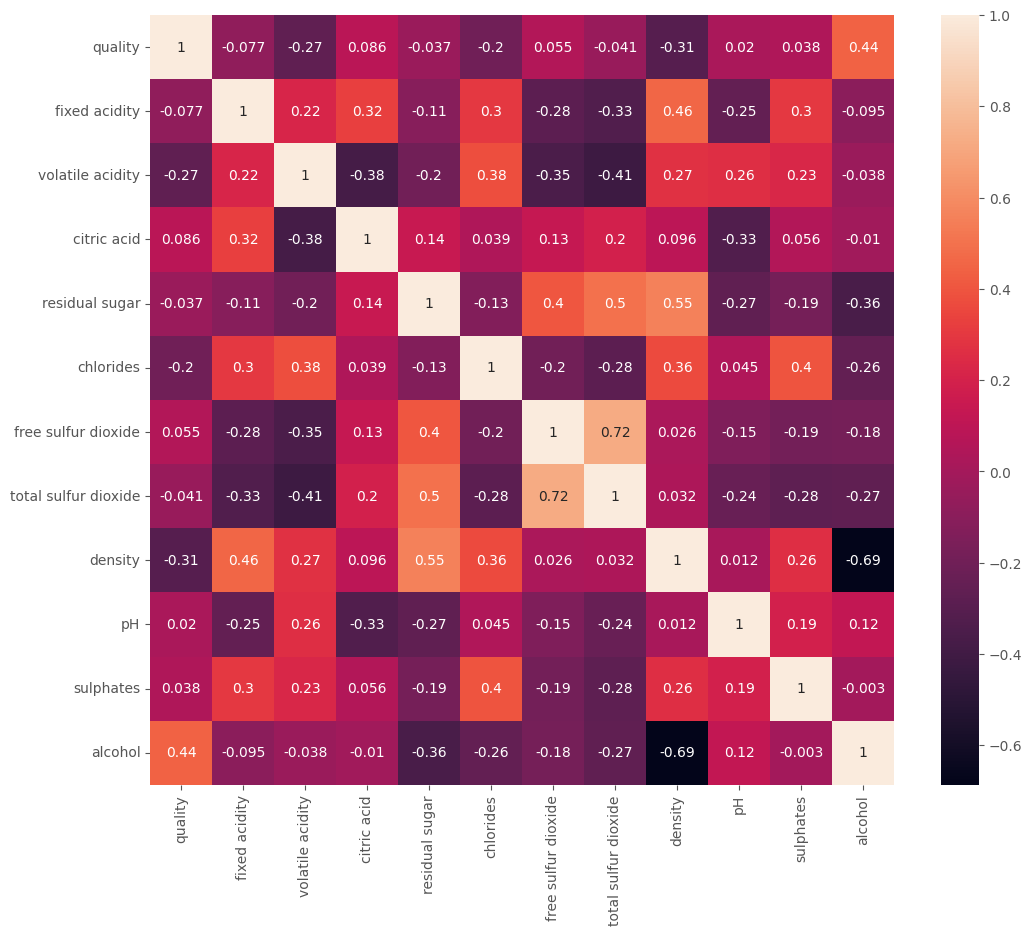

In [ ]:
df_corr = df[['quality','fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].dropna().corr()
df_corr 
plt.figure(figsize=(12, 10)) 
sns.heatmap(df_corr, annot=True)
plt.show()

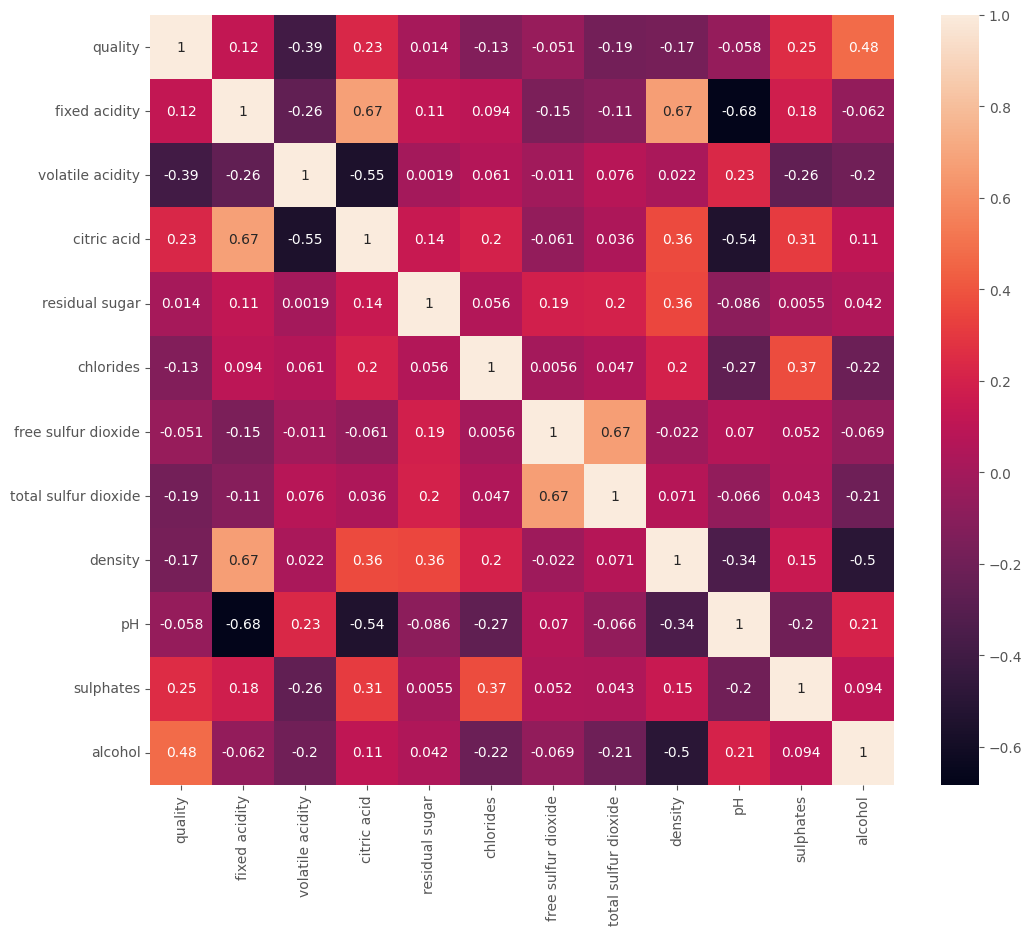

In [69]:
red_corr = df[df['type'] == "red"][[
    'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]].dropna().corr()
red_corr
plt.figure(figsize=(12, 10)) 
sns.heatmap(red_corr, annot=True)
plt.show()

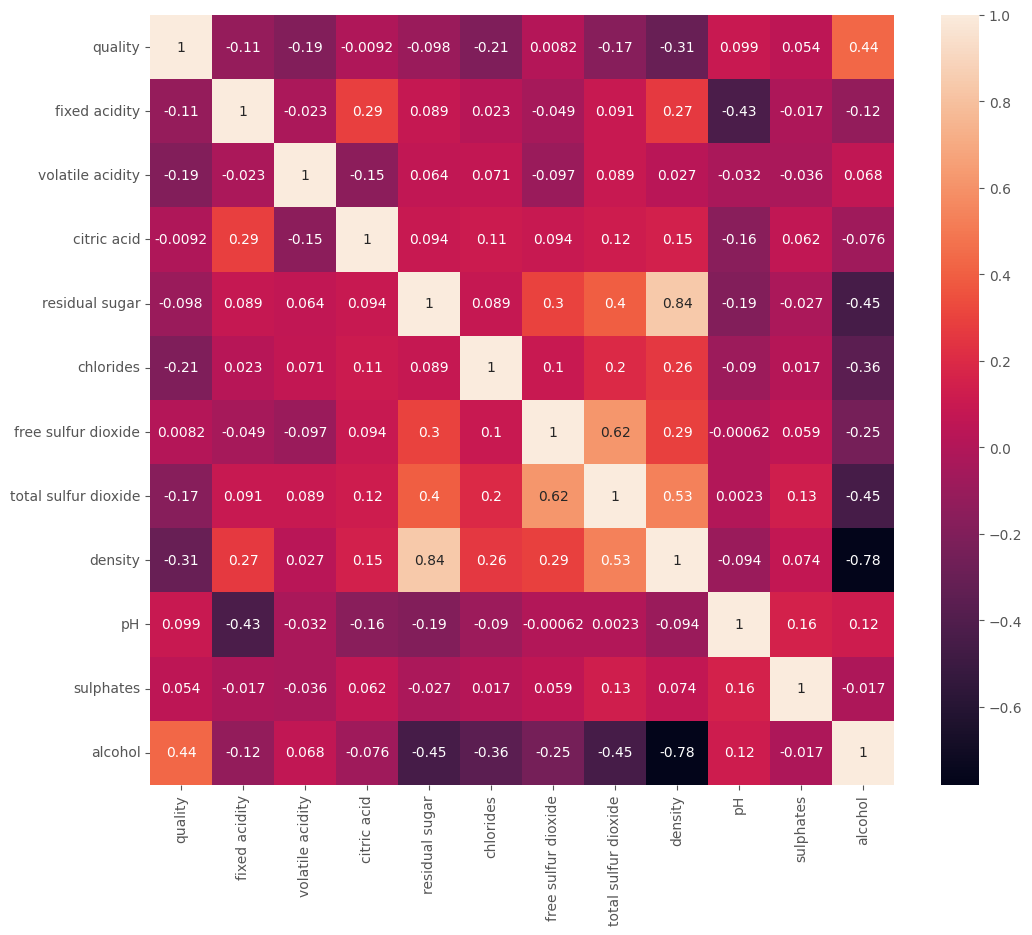

In [68]:
white_corr = df[df['type'] == "white"][[
    'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]].dropna().corr()
white_corr
plt.figure(figsize=(12, 10))
sns.heatmap(white_corr, annot=True)
plt.show()

When looking at the quality of wine overall, quality of red, and quality of white. Its clear that alcohol has a clear correlation to quality. However, when it comes to whites the aspects that correlated most to quality were alcohol and sulphates and overall pH. In reds, quality was more correlated to alcohol (of course), sulfates, and citric acid. 